# Goal
### My goal is to determine how effective Air BnB is for long term stays in New York; How many options are there, what is their pricing, and to graph that data by location

In [27]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

df = pd.read_csv('AB_NYC_2019.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

idlisting: ID

name: name of the listing

host_id: host ID

host_name: name of the host

neighbourhood_group: location

neighbourhood: area

latitude: latitude coordinates

longitude: longitude coordinates

room_type: listing space type

price: price in dollars

minimum_nights: amount of nights minimum

number_of_reviews: number of reviews

last_review: latest review

reviews_per_month: number of reviews per month

calculated_host_listings_count: amount of listing per host

availability_365: number of days when listing is available for booking


In [165]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [34]:
def Stay_Type(days):
    if days == 1:
        return 'Daily'
    elif days < 7:
        return 'Multi-Daily'
    elif days == 7 :
        return 'Weekly'
    elif days < 30:
        return 'Multi-Weekly'
    elif days == 30:
        return 'Monthly'
    else:
        return 'Multi-Monthly'

df['Stay Type'] = df['minimum_nights'].apply(Stay_Type)

In [35]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2                NaN                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

      Stay Type  
0         Daily  
1         Daily  
2   Multi-Daily  
3         Daily  
4  Multi-Weekly

In [164]:
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365     Stay Type  
0                   365         Daily  
1                   355         Daily  
2                   365   Multi-Daily  
3                   194         Daily  
4                     0  Multi-Weekly  
...                 ...           ...  
48890                 9   Multi-Daily  
48891                36   Mul

In [9]:
df['Stay Type'].value_counts()

Multi-Daily      26784
Daily            12720
Monthly           3760
Multi-Weekly      2826
Weekly            2058
Multi-Monthly      747
Name: Stay Type, dtype: int64

In [166]:
mdp = df[df['Stay Type'] == 'Multi-Daily']['price'].value_counts()
mdp.describe()

count     527.000000
mean       50.823529
std       135.281657
min         1.000000
25%         2.000000
50%         7.000000
75%        31.500000
max      1212.000000
Name: price, dtype: float64

In [167]:
dp = df[df['Stay Type'] == 'Daily']['price'].value_counts()
dp.describe()

count    443.000000
mean      28.713318
std       77.294386
min        1.000000
25%        1.000000
50%        4.000000
75%       18.000000
max      653.000000
Name: price, dtype: float64

In [168]:
mwp = df[df['Stay Type'] == 'Multi-Weekly']['price'].value_counts()
mwp.describe()

count    279.000000
mean      10.129032
std       18.585923
min        1.000000
25%        2.000000
50%        4.000000
75%        8.500000
max      120.000000
Name: price, dtype: float64

In [169]:
wp = df[df['Stay Type'] == 'Weekly']['price'].value_counts()
wp.describe()

count    233.000000
mean       8.832618
std       15.781983
min        1.000000
25%        1.000000
50%        3.000000
75%        7.000000
max      103.000000
Name: price, dtype: float64

In [171]:
mmp = df[df['Stay Type'] == 'Multi-Monthly']['price'].value_counts()
mmp.describe()

count    195.000000
mean       3.830769
std        5.464702
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       33.000000
Name: price, dtype: float64

In [172]:
mp = df[df['Stay Type'] == 'Monthly']['price'].sort_values()
mp.describe()

count     3760.000000
mean       182.563564
std        368.586676
min          0.000000
25%         70.000000
50%        135.000000
75%        200.000000
max      10000.000000
Name: price, dtype: float64

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

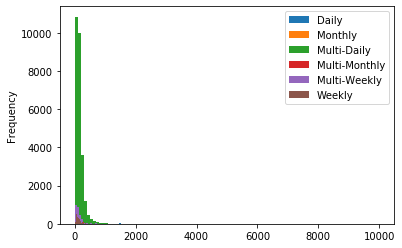

In [95]:
df.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief')

Text(0, 0.5, 'frequency')

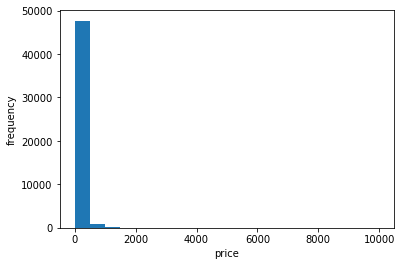

In [73]:
ax=df['price'].plot.hist(bins=20)
ax.set_xlabel('price')
ax.set_ylabel('frequency')

In [62]:
df['price'].sort_values()

25796        0
25634        0
25433        0
25753        0
23161        0
         ...  
40433     9999
12342     9999
17692    10000
9151     10000
29238    10000
Name: price, Length: 48895, dtype: int64

In [135]:
df2=df[df['price'] <= 2000]
df2['price'].sort_values()

25634       0
25433       0
26866       0
26841       0
25778       0
         ... 
496      2000
7513     2000
11021    2000
47350    2000
14385    2000
Name: price, Length: 48809, dtype: int64

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

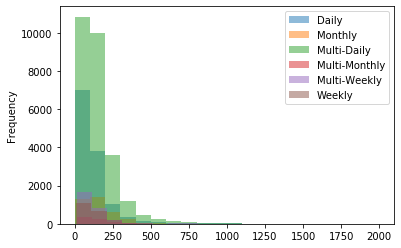

In [129]:
df2.groupby('Stay Type')['price'].plot.hist(bins=20, legend='brief',  alpha=0.5)

In [98]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [106]:
df.groupby('neighbourhood_group')['Stay Type'].value_counts()

neighbourhood_group  Stay Type    
Bronx                Multi-Daily        635
                     Daily              362
                     Weekly              30
                     Multi-Weekly        26
                     Monthly             25
                     Multi-Monthly       13
Brooklyn             Multi-Daily      12053
                     Daily             4650
                     Multi-Weekly      1206
                     Monthly           1015
                     Weekly             927
                     Multi-Monthly      253
Manhattan            Multi-Daily      11176
                     Daily             5418
                     Monthly           2399
                     Multi-Weekly      1357
                     Weekly             889
                     Multi-Monthly      422
Queens               Multi-Daily       2694
                     Daily             2178
                     Monthly            306
                     Multi-Weekly       2

In [107]:
df.groupby('neighbourhood_group')['price'].value_counts()

neighbourhood_group  price
Bronx                60       60
                     50       58
                     40       50
                     75       50
                     80       45
                              ..
Staten Island        700       1
                     800       1
                     1000      1
                     1250      1
                     5000      1
Name: price, Length: 1542, dtype: int64

In [115]:
bronx = df[df['neighbourhood_group'] == 'Bronx']
bronx.head()

id                                              name  host_id  \
171  44096                                  Room with a View   190409   
207  54626                    Cozy bedroom by Yankee Stadium   190409   
260  63588                                               LL3   295128   
261  63610  DOMINIQUE'S NY mini efficiency* wifi*metro*quiet   310670   
309  71812              Condo Apartment with laundry in unit   369015   

        host_name neighbourhood_group neighbourhood  latitude  longitude  \
171      Waundell               Bronx    Highbridge  40.83232  -73.93184   
207      Waundell               Bronx    Highbridge  40.83075  -73.93058   
260  Carol Gloria               Bronx  Clason Point  40.81309  -73.85514   
261           Vie               Bronx   Eastchester  40.88057  -73.83572   
309          Thai               Bronx   Kingsbridge  40.87207  -73.90193   

           room_type  price  minimum_nights  number_of_reviews last_review  \
171     Private room     40               1                219  2019-07-04   
207     Private room     45               1                138  2019-06-30   
260     Private room     90               2                  0         NaN   
261  Entire home/apt    105               2                 38  2019-06-27   
309  Entire home/apt     90              30                  4  2019-01-02   

     reviews_per_month  calculated_host_listings_count  availability_365  \
171               2.04                               3               353   
207               1.45                               3               323   
260                NaN                               7               349   
261               0.50                              13               365   
309               0.35                               2               346   

       Stay Type  
171        Daily  
207        Daily  
260  Multi-Daily  
261  Multi-Daily  
309      Monthly

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

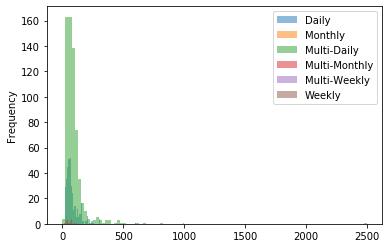

In [123]:
bronx.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief', alpha=0.5)

In [110]:
manhat = df[df['neighbourhood_group'] == 'Manhattan']
manhat.head()

id                                              name  host_id  host_name  \
1  2595                             Skylit Midtown Castle     2845   Jennifer   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192      Laura   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322      Chris   
7  5178                  Large Furnished Room Near B'way      8967   Shunichi   

  neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
1           Manhattan         Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan          Harlem  40.80902  -73.94190     Private room   
4           Manhattan     East Harlem  40.79851  -73.94399  Entire home/apt   
5           Manhattan     Murray Hill  40.74767  -73.97500  Entire home/apt   
7           Manhattan  Hell's Kitchen  40.76489  -73.98493     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   
4     80              10                  9  2018-11-19               0.10   
5    200               3                 74  2019-06-22               0.59   
7     79               2                430  2019-06-24               3.47   

   calculated_host_listings_count  availability_365     Stay Type  
1                               2               355         Daily  
2                               1               365   Multi-Daily  
4                               1                 0  Multi-Weekly  
5                               1               129   Multi-Daily  
7                               1               220   Multi-Daily

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

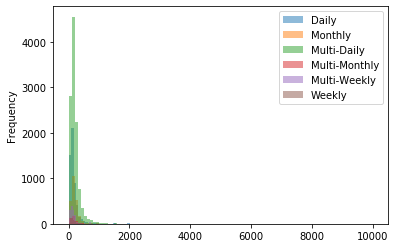

In [127]:
manhat.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief',  alpha=0.5)

In [111]:
brook = df[df['neighbourhood_group'] == 'Brooklyn']
brook.head()

id                                            name  host_id  \
0   2539              Clean & quiet apt home by the park     2787   
3   3831                 Cozy Entire Floor of Brownstone     4869   
6   5121                                 BlissArtsSpace!     7356   
12  5803  Lovely Room 1, Garden, Best Area, Legal rental     9744   
15  6848                Only 2 stops to Manhattan studio    15991   

        host_name neighbourhood_group       neighbourhood  latitude  \
0            John            Brooklyn          Kensington  40.64749   
3     LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
6           Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
12         Laurie            Brooklyn         South Slope  40.66829   
15  Allen & Irina            Brooklyn        Williamsburg  40.70837   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -73.97237     Private room    149               1                  9   
3   -73.95976  Entire home/apt     89               1                270   
6   -73.95596     Private room     60              45                 49   
12  -73.98779     Private room     89               4                167   
15  -73.95352  Entire home/apt    140               2                148   

   last_review  reviews_per_month  calculated_host_listings_count  \
0   2018-10-19               0.21                               6   
3   2019-07-05               4.64                               1   
6   2017-10-05               0.40                               1   
12  2019-06-24               1.34                               3   
15  2019-06-29               1.20                               1   

    availability_365      Stay Type  
0                365          Daily  
3                194          Daily  
6                  0  Multi-Monthly  
12               314    Multi-Daily  
15                46    Multi-Daily

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

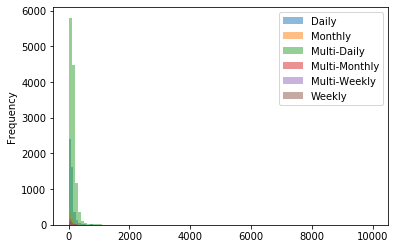

In [125]:
brook.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief',  alpha=0.5)

In [154]:
queen = df[df['neighbourhood_group'] == 'Queens']
queen.head()

id                                               name  host_id  \
46   12937  1 Stop fr. Manhattan! Private Suite,Landmark B...    50124   
77   18198                              Little King of Queens    70091   
143  32363                 Fully Furnished Basement Apartment   140025   
161  39593            A room w/ a Manhattan view, longer stay   110506   
181  45910                 Beautiful Queens Brownstone! - 5BR   204539   

    host_name neighbourhood_group     neighbourhood  latitude  longitude  \
46    Orestes              Queens  Long Island City  40.74771  -73.94740   
77     Justin              Queens          Woodside  40.75038  -73.90334   
143    Fredah              Queens          Flushing  40.74028  -73.83168   
161     Myung              Queens         Sunnyside  40.74559  -73.92313   
181      Mark              Queens         Ridgewood  40.70382  -73.89797   

           room_type  price  minimum_nights  number_of_reviews last_review  \
46      Private room    130               3                248  2019-07-01   
77      Private room     70              30                 25  2019-05-31   
143     Private room    140               2                  1  2011-09-19   
161     Private room     79              30                 28  2019-04-12   
181  Entire home/apt    350               8                 10  2019-05-12   

     reviews_per_month  calculated_host_listings_count  availability_365  \
46                2.25                               1               215   
77                0.22                               1               324   
143               0.01                               1                 1   
161               0.26                               1               126   
181               0.11                               5               365   

        Stay Type  
46    Multi-Daily  
77        Monthly  
143   Multi-Daily  
161       Monthly  
181  Multi-Weekly

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

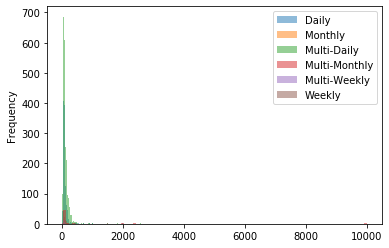

In [126]:
queen.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief',  alpha=0.5)

In [113]:
staten = df[df['neighbourhood_group'] == 'Staten Island']
staten.head()

id                                name  host_id             host_name  \
169  42882           New York room with a view   185978  Newyorkroomwithaview   
249  62452      A SpeciaL!! Private Room in NY   303939              Lissette   
250  62461         B NYC Staten Alternative...   303939              Lissette   
251  62787         C Private Room By The Ferry   303939              Lissette   
256  63320  D Private Che@p Room 2 Explore NYC   303939              Lissette   

    neighbourhood_group  neighbourhood  latitude  longitude     room_type  \
169       Staten Island     St. George  40.64524  -74.08088  Private room   
249       Staten Island  Tompkinsville  40.63536  -74.08537  Private room   
250       Staten Island  Tompkinsville  40.63627  -74.08543  Private room   
251       Staten Island  Tompkinsville  40.63518  -74.08546  Private room   
256       Staten Island  Tompkinsville  40.63481  -74.08519  Private room   

     price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
169     70               2                166  2019-06-13               1.66   
249     36               2                193  2019-06-25               1.85   
250     37               2                147  2019-06-10               1.44   
251     37               2                177  2019-07-02               1.71   
256     36               2                333  2019-07-02               3.19   

     calculated_host_listings_count  availability_365    Stay Type  
169                               1               312  Multi-Daily  
249                               6               360  Multi-Daily  
250                               6                 0  Multi-Daily  
251                               6               320  Multi-Daily  
256                               6               340  Multi-Daily

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

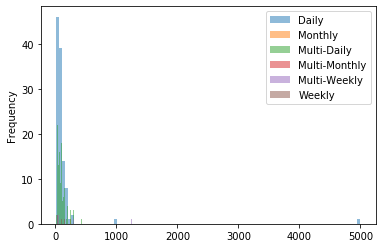

In [124]:
staten.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief',  alpha=0.5)

In [131]:
df[df['Stay Type'] == 'Monthly']['price'].sort_values()

26866        0
26841        0
2860        10
28841       15
39027       19
         ...  
43009     5100
37194     6500
30268     8500
40433     9999
29238    10000
Name: price, Length: 3760, dtype: int64

In [143]:
def find_remove_outlier_iqr(data_sample):
    # calculate interquartile range
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    iqr = q75 - q25
    print(q75, q25)
    print(iqr)
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers

find_remove_outlier_iqr(df['price'])

175.0 69.0
106.0


[375,
 800,
 500,
 350,
 400,
 475,
 350,
 500,
 500,
 390,
 575,
 500,
 350,
 349,
 349,
 650,
 599,
 395,
 495,
 375,
 451,
 450,
 500,
 350,
 400,
 2000,
 500,
 429,
 350,
 350,
 399,
 438,
 700,
 400,
 850,
 349,
 599,
 495,
 760,
 375,
 485,
 350,
 1300,
 402,
 800,
 385,
 450,
 499,
 500,
 387,
 350,
 3000,
 549,
 350,
 500,
 350,
 395,
 1300,
 500,
 380,
 450,
 350,
 385,
 499,
 349,
 800,
 349,
 350,
 350,
 375,
 450,
 500,
 399,
 700,
 500,
 400,
 1000,
 700,
 350,
 433,
 595,
 349,
 2000,
 355,
 550,
 380,
 900,
 399,
 425,
 495,
 350,
 375,
 625,
 350,
 575,
 400,
 500,
 600,
 390,
 350,
 350,
 465,
 349,
 340,
 4000,
 500,
 400,
 400,
 349,
 495,
 999,
 800,
 339,
 500,
 2500,
 890,
 399,
 349,
 400,
 650,
 350,
 349,
 420,
 950,
 575,
 350,
 550,
 499,
 1000,
 499,
 350,
 1395,
 425,
 395,
 650,
 550,
 1000,
 750,
 499,
 1000,
 350,
 350,
 350,
 350,
 595,
 390,
 350,
 399,
 1500,
 1899,
 399,
 465,
 350,
 495,
 800,
 450,
 350,
 5000,
 349,
 345,
 390,
 600,
 1100,
 550,


In [146]:
priNoOut=df[df['price'] < (175+(1.5*106))]

In [163]:
priNoOut

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365     Stay Type  
0                   365         Daily  
1                   355         Daily  
2                   365   Multi-Daily  
3                   194         Daily  
4                     0  Multi-Weekly  
...                 ...           ...  
48890                 9   Multi-Daily  
48891                36   Mul

In [149]:
priNoOut['price'].value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
292       1
322       1
331       1
313       1
296       1
Name: price, Length: 321, dtype: int64

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

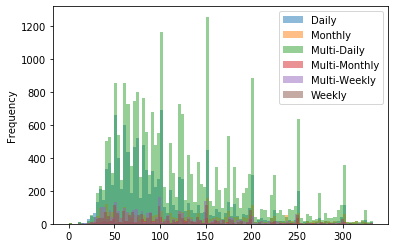

In [150]:
priNoOut.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief', alpha=0.5)

In [153]:
queenO = priNoOut[priNoOut['neighbourhood_group'] == 'Queens']
queenO.head()

id                                               name  host_id  \
46   12937  1 Stop fr. Manhattan! Private Suite,Landmark B...    50124   
77   18198                              Little King of Queens    70091   
143  32363                 Fully Furnished Basement Apartment   140025   
161  39593            A room w/ a Manhattan view, longer stay   110506   
196  51850                              ( F) Excellent/Pvt Rm    27848   

    host_name neighbourhood_group     neighbourhood  latitude  longitude  \
46    Orestes              Queens  Long Island City  40.74771  -73.94740   
77     Justin              Queens          Woodside  40.75038  -73.90334   
143    Fredah              Queens          Flushing  40.74028  -73.83168   
161     Myung              Queens         Sunnyside  40.74559  -73.92313   
196   Jullett              Queens           Jamaica  40.67252  -73.76597   

        room_type  price  minimum_nights  number_of_reviews last_review  \
46   Private room    130               3                248  2019-07-01   
77   Private room     70              30                 25  2019-05-31   
143  Private room    140               2                  1  2011-09-19   
161  Private room     79              30                 28  2019-04-12   
196  Private room     55               2                 52  2019-05-20   

     reviews_per_month  calculated_host_listings_count  availability_365  \
46                2.25                               1               215   
77                0.22                               1               324   
143               0.01                               1                 1   
161               0.26                               1               126   
196               0.49                               2               365   

       Stay Type  
46   Multi-Daily  
77       Monthly  
143  Multi-Daily  
161      Monthly  
196  Multi-Daily

In [173]:
queenO.describe()

id       host_id     latitude    longitude        price  \
count  5.567000e+03  5.567000e+03  5567.000000  5567.000000  5567.000000   
mean   2.174978e+07  9.614604e+07    40.731660   -73.872964    88.904437   
std    1.036095e+07  8.425829e+07     0.040024     0.056804    53.536041   
min    1.293700e+04  3.211000e+03    40.565460   -73.959270    10.000000   
25%    1.398078e+07  2.119394e+07    40.707410   -73.917390    50.000000   
50%    2.256236e+07  6.826777e+07    40.744710   -73.895070    74.000000   
75%    3.074678e+07  1.580872e+08    40.759815   -73.830115   108.000000   
max    3.648436e+07  2.742256e+08    40.795110   -73.712990   325.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     5567.000000        5567.000000        4514.000000   
mean         5.072391          27.971798           1.951083   
std         13.462033          52.256180           2.220208   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.370000   
50%          2.000000           7.000000           1.220000   
75%          3.000000          32.000000           2.800000   
max        500.000000         629.000000          20.940000   

       calculated_host_listings_count  availability_365  
count                     5567.000000       5567.000000  
mean                         4.094665        143.019041  
std                         12.550016        135.071371  
min                          1.000000          0.000000  
25%                          1.000000          1.000000  
50%                          1.000000         95.000000  
75%                          3.000000        283.000000  
max                        103.000000        365.000000

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

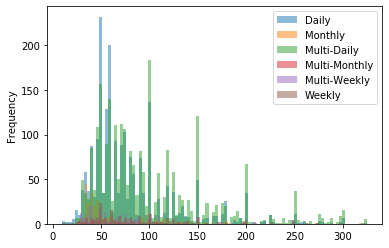

In [158]:
queenO.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief',  alpha=0.5)

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

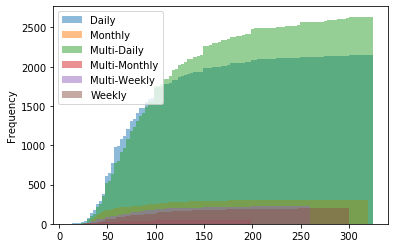

In [185]:
queenO.groupby('Stay Type')['price'].plot.hist(bins=100, cumulative=True, legend='brief',  alpha=0.5)

In [152]:
manhatO = priNoOut[priNoOut['neighbourhood_group'] == 'Manhattan']
manhatO.head()

id                                              name  host_id  host_name  \
1  2595                             Skylit Midtown Castle     2845   Jennifer   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192      Laura   
5  5099         Large Cozy 1 BR Apartment In Midtown East     7322      Chris   
7  5178                  Large Furnished Room Near B'way      8967   Shunichi   

  neighbourhood_group   neighbourhood  latitude  longitude        room_type  \
1           Manhattan         Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan          Harlem  40.80902  -73.94190     Private room   
4           Manhattan     East Harlem  40.79851  -73.94399  Entire home/apt   
5           Manhattan     Murray Hill  40.74767  -73.97500  Entire home/apt   
7           Manhattan  Hell's Kitchen  40.76489  -73.98493     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0         NaN                NaN   
4     80              10                  9  2018-11-19               0.10   
5    200               3                 74  2019-06-22               0.59   
7     79               2                430  2019-06-24               3.47   

   calculated_host_listings_count  availability_365     Stay Type  
1                               2               355         Daily  
2                               1               365   Multi-Daily  
4                               1                 0  Multi-Weekly  
5                               1               129   Multi-Daily  
7                               1               220   Multi-Daily

In [174]:
manhatO.describe()

id       host_id      latitude     longitude         price  \
count  1.950100e+04  1.950100e+04  19501.000000  19501.000000  19501.000000   
mean   1.847232e+07  6.490953e+07     40.766662    -73.973519    145.904620   
std    1.106577e+07  7.720572e+07      0.039262      0.022353     70.417743   
min    2.595000e+03  2.845000e+03     40.702340    -74.018510      0.000000   
25%    9.043722e+06  8.245913e+06     40.732070    -73.990850     90.000000   
50%    1.862661e+07  2.987112e+07     40.762030    -73.979580    135.000000   
75%    2.891931e+07  9.717265e+07     40.798310    -73.952570    199.000000   
max    3.648724e+07  2.743213e+08     40.876650    -73.908550    333.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    19501.000000       19501.000000       15277.000000   
mean         8.546331          21.954156           1.262157   
std         23.592936          43.816128           1.637489   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.160000   
50%          3.000000           5.000000           0.590000   
75%          6.000000          20.000000           1.850000   
max       1250.000000         607.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    19501.000000      19501.000000  
mean                        11.969694        105.837701  
std                         46.149655        130.376836  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         29.000000  
75%                          2.000000        213.000000  
max                        327.000000        365.000000

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

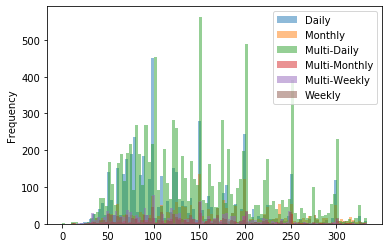

In [159]:
manhatO.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief',  alpha=0.5)

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

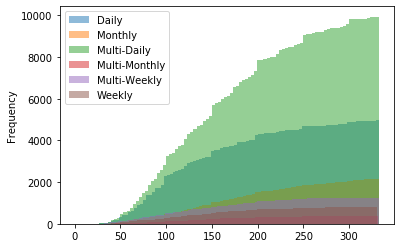

In [184]:
manhatO.groupby('Stay Type')['price'].plot.hist(bins=100, cumulative=True, legend='brief',  alpha=0.5)

In [155]:
bronxO = priNoOut[priNoOut['neighbourhood_group'] == 'Bronx']
bronxO.head()

id                                              name  host_id  \
171  44096                                  Room with a View   190409   
207  54626                    Cozy bedroom by Yankee Stadium   190409   
260  63588                                               LL3   295128   
261  63610  DOMINIQUE'S NY mini efficiency* wifi*metro*quiet   310670   
309  71812              Condo Apartment with laundry in unit   369015   

        host_name neighbourhood_group neighbourhood  latitude  longitude  \
171      Waundell               Bronx    Highbridge  40.83232  -73.93184   
207      Waundell               Bronx    Highbridge  40.83075  -73.93058   
260  Carol Gloria               Bronx  Clason Point  40.81309  -73.85514   
261           Vie               Bronx   Eastchester  40.88057  -73.83572   
309          Thai               Bronx   Kingsbridge  40.87207  -73.90193   

           room_type  price  minimum_nights  number_of_reviews last_review  \
171     Private room     40               1                219  2019-07-04   
207     Private room     45               1                138  2019-06-30   
260     Private room     90               2                  0         NaN   
261  Entire home/apt    105               2                 38  2019-06-27   
309  Entire home/apt     90              30                  4  2019-01-02   

     reviews_per_month  calculated_host_listings_count  availability_365  \
171               2.04                               3               353   
207               1.45                               3               323   
260                NaN                               7               349   
261               0.50                              13               365   
309               0.35                               2               346   

       Stay Type  
171        Daily  
207        Daily  
260  Multi-Daily  
261  Multi-Daily  
309      Monthly

In [175]:
bronxO.describe()

id       host_id     latitude    longitude        price  \
count  1.070000e+03  1.070000e+03  1070.000000  1070.000000  1070.000000   
mean   2.275312e+07  1.061791e+08    40.848208   -73.884825    77.365421   
std    1.024594e+07  8.743876e+07     0.026683     0.032602    47.110940   
min    4.409600e+04  1.222100e+04    40.800110   -73.931900     0.000000   
25%    1.621474e+07  2.146033e+07    40.826628   -73.911068    45.000000   
50%    2.399778e+07  9.187481e+07    40.846205   -73.892700    65.000000   
75%    3.192457e+07  1.796772e+08    40.869452   -73.858648    95.000000   
max    3.644225e+07  2.738773e+08    40.913060   -73.781580   325.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     1070.000000        1070.000000         866.000000   
mean         4.598131          26.341121           1.851305   
std         15.779503          42.470201           1.676619   
min          1.000000           0.000000           0.020000   
25%          1.000000           1.000000           0.490000   
50%          2.000000           9.000000           1.400000   
75%          3.000000          32.000000           2.817500   
max        365.000000         321.000000          10.340000   

       calculated_host_listings_count  availability_365  
count                     1070.000000       1070.000000  
mean                         2.224299        164.564486  
std                          2.365200        134.972883  
min                          1.000000          0.000000  
25%                          1.000000         36.250000  
50%                          1.000000        146.000000  
75%                          2.000000        312.000000  
max                         37.000000        365.000000

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

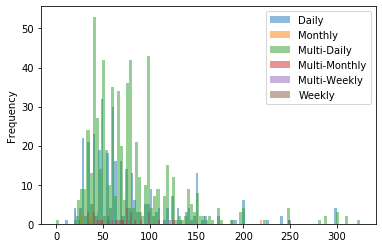

In [160]:
bronxO.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief',  alpha=0.5)

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

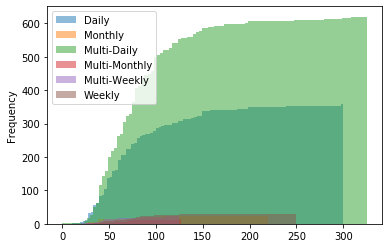

In [183]:
bronxO.groupby('Stay Type')['price'].plot.hist(bins=100, cumulative=True, legend='brief',  alpha=0.5)

In [156]:
statenO = priNoOut[priNoOut['neighbourhood_group'] == 'Staten Island']
statenO.head()

id                                name  host_id             host_name  \
169  42882           New York room with a view   185978  Newyorkroomwithaview   
249  62452      A SpeciaL!! Private Room in NY   303939              Lissette   
250  62461         B NYC Staten Alternative...   303939              Lissette   
251  62787         C Private Room By The Ferry   303939              Lissette   
256  63320  D Private Che@p Room 2 Explore NYC   303939              Lissette   

    neighbourhood_group  neighbourhood  latitude  longitude     room_type  \
169       Staten Island     St. George  40.64524  -74.08088  Private room   
249       Staten Island  Tompkinsville  40.63536  -74.08537  Private room   
250       Staten Island  Tompkinsville  40.63627  -74.08543  Private room   
251       Staten Island  Tompkinsville  40.63518  -74.08546  Private room   
256       Staten Island  Tompkinsville  40.63481  -74.08519  Private room   

     price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
169     70               2                166  2019-06-13               1.66   
249     36               2                193  2019-06-25               1.85   
250     37               2                147  2019-06-10               1.44   
251     37               2                177  2019-07-02               1.71   
256     36               2                333  2019-07-02               3.19   

     calculated_host_listings_count  availability_365    Stay Type  
169                               1               312  Multi-Daily  
249                               6               360  Multi-Daily  
250                               6                 0  Multi-Daily  
251                               6               320  Multi-Daily  
256                               6               340  Multi-Daily

In [177]:
statenO.describe()

id       host_id    latitude   longitude       price  \
count  3.650000e+02  3.650000e+02  365.000000  365.000000  365.000000   
mean   2.172860e+07  9.970187e+07   40.610503  -74.105723   89.235616   
std    1.028130e+07  7.914363e+07    0.032162    0.035906   57.700147   
min    4.288200e+04  1.552300e+04   40.499790  -74.244420   13.000000   
25%    1.583357e+07  2.617808e+07   40.593850  -74.123930   50.000000   
50%    2.314811e+07  9.557054e+07   40.622570  -74.089300   75.000000   
75%    3.008296e+07  1.581790e+08   40.634740  -74.081270  105.000000   
max    3.643834e+07  2.725577e+08   40.647790  -74.062080  300.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count      365.000000         365.000000         312.000000   
mean         4.824658          31.605479           1.884231   
std         19.934148          45.092006           1.684570   
min          1.000000           0.000000           0.020000   
25%          1.000000           2.000000           0.717500   
50%          2.000000          13.000000           1.410000   
75%          3.000000          45.000000           2.625000   
max        365.000000         333.000000          10.120000   

       calculated_host_listings_count  availability_365  
count                      365.000000        365.000000  
mean                         2.334247        199.893151  
std                          1.926694        131.038548  
min                          1.000000          0.000000  
25%                          1.000000         80.000000  
50%                          1.000000        219.000000  
75%                          3.000000        326.000000  
max                          8.000000        365.000000

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

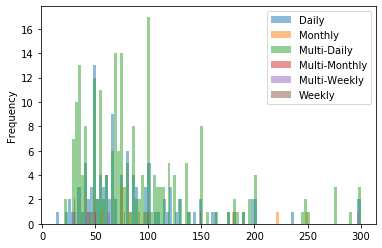

In [161]:
statenO.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief',  alpha=0.5)

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

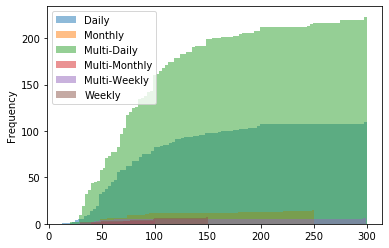

In [182]:
statenO.groupby('Stay Type')['price'].plot.hist(bins=100, cumulative=True, legend='brief',  alpha=0.5)

In [157]:
brookO = priNoOut[priNoOut['neighbourhood_group'] == 'Brooklyn']
brookO.head()

id                                            name  host_id  \
0   2539              Clean & quiet apt home by the park     2787   
3   3831                 Cozy Entire Floor of Brownstone     4869   
6   5121                                 BlissArtsSpace!     7356   
12  5803  Lovely Room 1, Garden, Best Area, Legal rental     9744   
15  6848                Only 2 stops to Manhattan studio    15991   

        host_name neighbourhood_group       neighbourhood  latitude  \
0            John            Brooklyn          Kensington  40.64749   
3     LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
6           Garon            Brooklyn  Bedford-Stuyvesant  40.68688   
12         Laurie            Brooklyn         South Slope  40.66829   
15  Allen & Irina            Brooklyn        Williamsburg  40.70837   

    longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -73.97237     Private room    149               1                  9   
3   -73.95976  Entire home/apt     89               1                270   
6   -73.95596     Private room     60              45                 49   
12  -73.98779     Private room     89               4                167   
15  -73.95352  Entire home/apt    140               2                148   

   last_review  reviews_per_month  calculated_host_listings_count  \
0   2018-10-19               0.21                               6   
3   2019-07-05               4.64                               1   
6   2017-10-05               0.40                               1   
12  2019-06-24               1.34                               3   
15  2019-06-29               1.20                               1   

    availability_365      Stay Type  
0                365          Daily  
3                194          Daily  
6                  0  Multi-Monthly  
12               314    Multi-Daily  
15                46    Multi-Daily

In [178]:
brookO.describe()

id       host_id      latitude     longitude         price  \
count  1.941500e+04  1.941500e+04  19415.000000  19415.000000  19415.000000   
mean   1.824182e+07  5.637151e+07     40.684853    -73.950853    105.699614   
std    1.079492e+07  7.212686e+07      0.027441      0.025517     60.937808   
min    2.539000e+03  2.438000e+03     40.571150    -74.039420      0.000000   
25%    8.767934e+06  5.654072e+06     40.672400    -73.963170     60.000000   
50%    1.884251e+07  2.290235e+07     40.687500    -73.951410     90.000000   
75%    2.778432e+07  7.844135e+07     40.704680    -73.935380    140.000000   
max    3.648506e+07  2.743076e+08     40.738900    -73.856760    333.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    19415.000000       19415.000000       15940.000000   
mean         6.021375          24.513830           1.291708   
std         17.193444          44.700108           1.524952   
min          1.000000           0.000000           0.010000   
25%          2.000000           1.000000           0.180000   
50%          3.000000           6.000000           0.660000   
75%          5.000000          26.000000           1.992500   
max        999.000000         488.000000          14.000000   

       calculated_host_listings_count  availability_365  
count                    19415.000000      19415.000000  
mean                         2.293999         98.500644  
std                          5.331370        125.429709  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         26.000000  
75%                          2.000000        185.000000  
max                        232.000000        365.000000

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

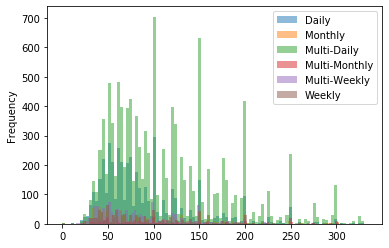

In [180]:
brookO.groupby('Stay Type')['price'].plot.hist(bins=100, legend='brief',  alpha=0.5)

Stay Type
Daily            AxesSubplot(0.125,0.125;0.775x0.755)
Monthly          AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Daily      AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Monthly    AxesSubplot(0.125,0.125;0.775x0.755)
Multi-Weekly     AxesSubplot(0.125,0.125;0.775x0.755)
Weekly           AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

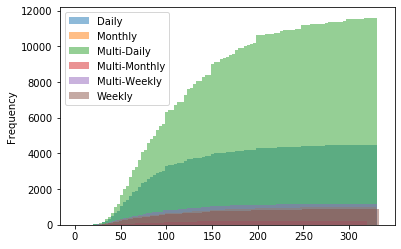

In [181]:
brookO.groupby('Stay Type')['price'].plot.hist(bins=100, cumulative=True, legend='brief',  alpha=0.5)

# How I did it...

My goal in this anaylsis was to examine Air BnB's New York data from 2019, and determine, which type of stay offered the best rates, and how those rates changed based on the Neighbourhood the Air BnB was located.

I started this analysis by seperating the number of minimum days into types of stay; Each location was given a qualifier that made it easy to tell how many days the property would be bookable for. Those qualifiers were: Daily (bookable by any day), Multi-Daily (bookable by multiple day at a time), Weekly (bookable by week), Multi-Weekly (bookable by more than a week at a time), Monthly (bookable by month), Multi-Monthly (bookable by more than a month at a time). The main purpose of this split was to make the data more readable in graphing, for sort-term vs long-term properties.

Next my goal was to examine the total cost graph and how that was changed by stay-type. Following that I examined the data by neighbourhood and stay-type/price. Finally, I did some outlier checking and examined the data that fit the IQR analysis, by neighbourhood, stay type, and price.

# Why I did it...

My reasoning was to find the best stays, as it could help determine possible alternatives for long term stay for people who need to be in New York for longer than a month periods, but shorter than a year periods. Cleaning the data and sorting by price, also gives us a better understanding of how the market in New York looks year round for rental properties.

# What I found...

Through my analysis I found a few trends:

1 - Most poperties up for rent on Air BnB are low cost* per month (\*About the same as a daily hotel)

2 - The largest rent quantifier for stay type is multi-day stays, followed by Daily, than weekly/multi-weekly, and monthly/multi-monthly being the lowest

3 - Most rents are rounded numbers divisible by 5; aka most rent hover around 50, 100, 150, etc

4 - Brooklyn and Manhattan rent out the most properties, followed by queens, the bronx and staten island with the least

5 - Even after IQR analysis, those placements are still correct

6 - IQR dismisses about 3000 properties

A breakdown of each Location (post iqr) finds the following:

Manhattan - One of the largest markets, with a mode of 150 and a left heavy distribution, but a significant number of right side data points. Additionally, there is not real difference between which stay type in price, most types have a similar distribution. Manhattan would be a more expensive option on average, but fair, regardless of stay.

# What I found (cont)...

Brooklyn - The largest market, with a fairly large left heavy skew, though still fairly exspensive with a mode at 100, and fairly similar median. Also not much derivation in price based on stay type, though daily seems to have more lower cost options than other types. Cheaper than Manhattan, but fairly exspensive still.

Queens - The Third largest market, Queens differs in that it has a very high single day minimum grouping at a fairly low price, with its mode at 50 and similar median. it too is a left skewed distribution, but differs as well with fairly few high cost daily rentals. A cheaper options if staying in New York with still a large amount of properties to choose from.

Bronx - The second smallest market, with a large dip from queens in quantity, it reflects a similar trend with a left skewed distribution and little high cost rentals. It is unquie with the lowest mode of about 40, and a fairly solid distrubtion center around 50. Definitely a cheaper option though no distinguishable differences between stay type.

Staten Island - The smallest market, it does not reflect the trend of smaller equalling lower cost. with a mode of 100 and a right skewed distribution, this market has an anomoly, where it has a large quantity of cheaper options, a few median options, and quite a sizable higher cost rentals, compared to most distributions. aka there is not a huge drop off after the price increases post mode.

# Conclusion...

New York is a fairly exspensive place to live and visit, however there exist a sizable market for long term stay at a fairly competitive rate, especially if you stay outside Manhattan. With Air BnB, you won't find much price difference based on how many minimum days are required to stay, providing no real incentive to long term residents, but does prevent much price gouging on short term stays. The biggest considerations on pricing for long term stays would be location, with Queens and the Bronxs offering the plenty of solutions at affordable prices. However as a general comparison, Brookyln and Manhattan still provide the largest variety, with competitive pricing to Queens and the Bronx, just not as many. Overall, Air BnB seems to be used for short term stays, but definitely can allow for long term visits, such as internships, job projects, or temporary housing while relocating.